In [2]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats
library(tidytext)
library("dplyr")
library(tidyverse) # metapackage with lots of helpful functions
library(ggplot2)


## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.3.0.9000     ✔ readr   1.3.1     
✔ tibble  2.1.3          ✔ purrr   0.3.3     
✔ tidyr   1.0.2          ✔ stringr 1.4.0     
✔ ggplot2 3.3.0.9000     ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "million-headlines"

In [3]:
#read csv file
data <- read_csv("../input/million-headlines/abcnews-date-text.csv")

Parsed with column specification:
cols(
  publish_date = col_double(),
  headline_text = col_character()
)



In [4]:
colnames(data)  #'publish_date''headline_text'
nrow(data) #1186018 rows
text_df <- data.frame(line=1:1186018,text_content = data$headline_text,stringsAsFactors=FALSE) #tokenising column text

[1] "publish_date"  "headline_text"

[1] 1186018

In [5]:
q_content_data <- text_df %>%
  unnest_tokens(word, text_content)#tokenization

In [6]:
head(text_df)

,line,text_content
,<int>,<chr>
1,1,aba decides against community broadcasting licence
2,2,act fire witnesses must be aware of defamation
3,3,a g calls for infrastructure protection summit
4,4,air nz staff in aust strike for pay rise
5,5,air nz strike to affect australian travellers
6,6,ambitious olsson wins triple jump


In [7]:
tidy_text <- data %>%
  unnest_tokens(word, headline_text)

In [8]:
data(stop_words)
tidy_text <- tidy_text %>%
  anti_join(stop_words)#removing the stop words from tidy_text

Joining, by = "word"



In [9]:
tidy_text %>%
  count(word, sort = TRUE)#shows the frequency of the words.

word,n
<chr>,<int>
police,38163
court,17416
govt,17006
council,16698
interview,15344
fire,14905
australia,14553
nsw,14107
plan,12719


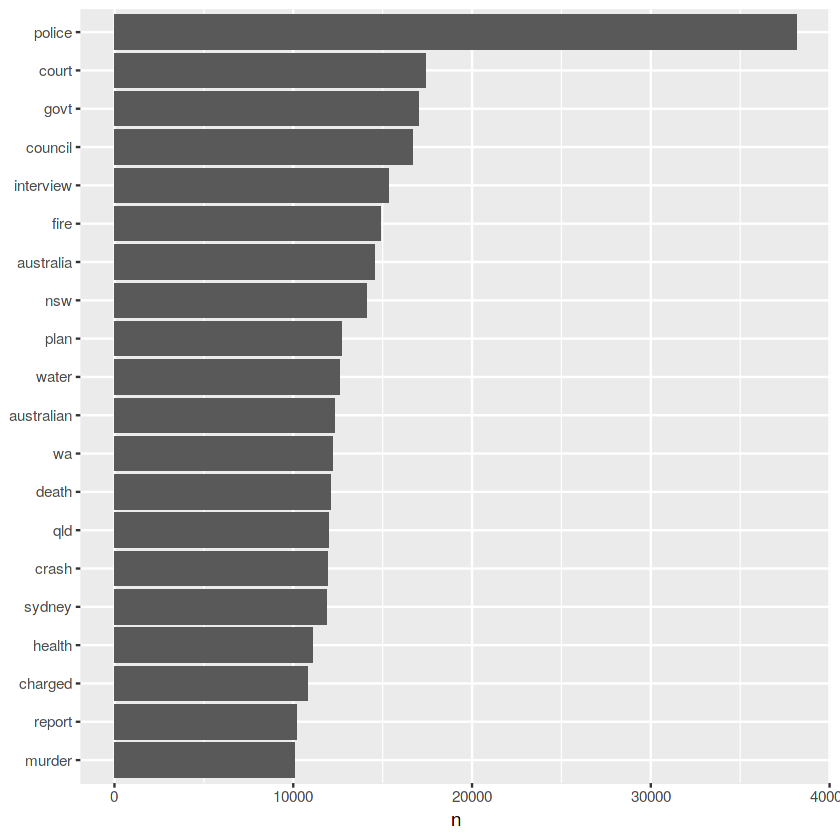

In [10]:
#visualizing word that appear more than 10000 times
tidy_text %>%
  count(word, sort = TRUE) %>%
  filter(n > 10000) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  geom_bar(stat = "identity") +
  xlab(NULL) +
  coord_flip()

In [11]:
head(tidy_text)

publish_date,word
<dbl>,<chr>
20030219,aba
20030219,decides
20030219,community
20030219,broadcasting
20030219,licence
20030219,act


In [12]:
library("SnowballC")
tidy_text <- data %>%
  unnest_tokens(word, headline_text) %>%
  mutate(word = wordStem(word)) #stemming out words like friends and friend.

In [13]:
tidy_text <- tidy_text %>%
  anti_join(stop_words)

Joining, by = "word"



In [14]:
tidy_text %>%
  count(word, sort = TRUE)


word,n
<chr>,<int>
polic,38408
sai,27093
plan,22781
charg,20492
call,20126
council,19040
fire,18323
govt,17824
court,17803


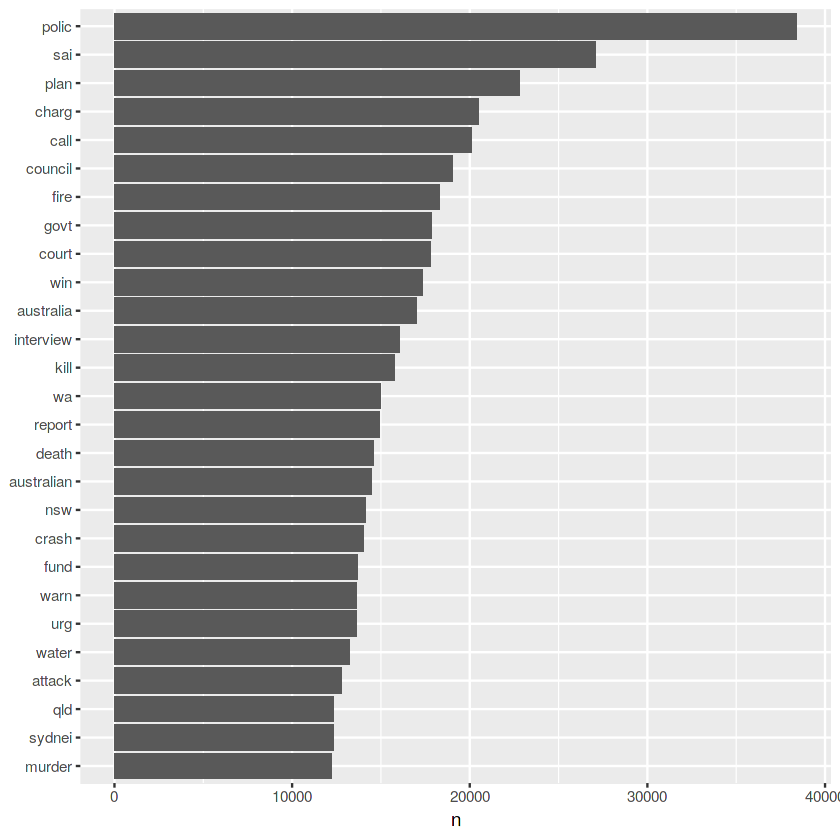

In [15]:
#visualizing word that appear more than 12000 times
tidy_text %>%
  count(word, sort = TRUE) %>%
  filter(n > 12000) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n)) +
  geom_bar(stat = "identity") +
  xlab(NULL) +
  coord_flip()

Loading required package: RColorBrewer

Joining, by = "word"



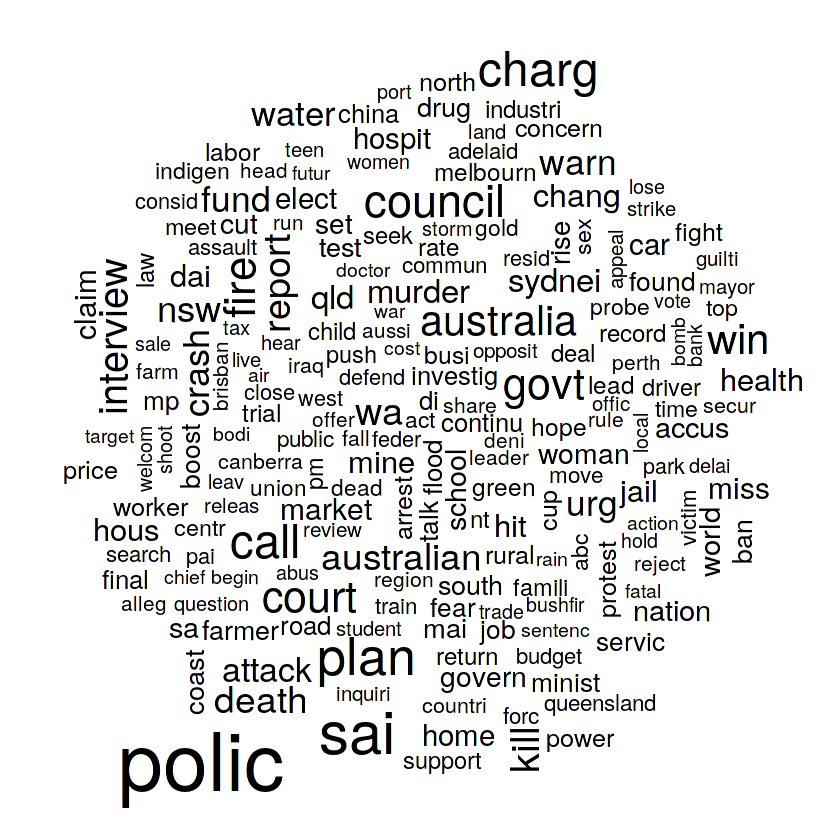

In [16]:
library("wordcloud")

tidy_text %>%
  anti_join(stop_words) %>%
  count(word) %>%
  with(wordcloud(word, n, max.words = 200))


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Joining, by = "word"



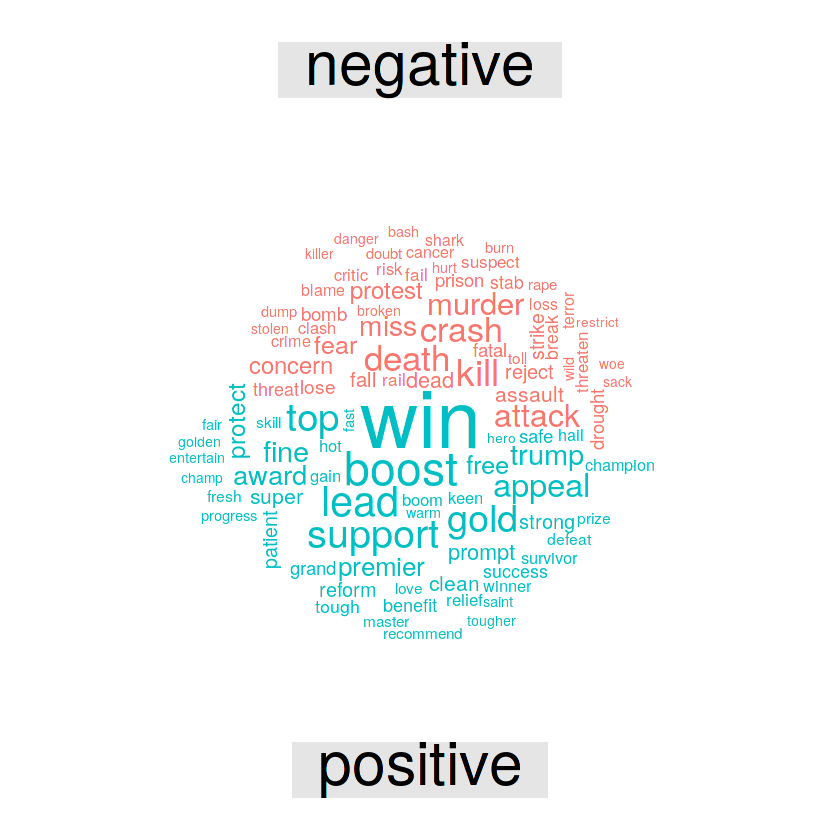

In [17]:
library("reshape2")

tidy_text %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("#F8766D", "#00BFC4"),
                   max.words = 100) # if not running -> run library of dplyr and tidy_text

In [18]:
library(tm)
library(topicmodels)
library(slam)

Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate


The following object is masked from ‘package:httr’:

    content




In [19]:
data <- data[1:1000,]
corpus <- Corpus(VectorSource(data$headline_text), readerControl=list(language="en"))#variable will be diff
dtm <- DocumentTermMatrix(corpus, control = list(stopwords = TRUE, minWordLength = 2, removeNumbers = TRUE, removePunctuation = TRUE,  stemDocument = TRUE))
rowTotals <- apply(dtm , 1, sum) #Find the sum of words in each Document
dtm.new   <- dtm[rowTotals> 0, ] #remove all docs without words
lda <- LDA(dtm.new, k = 8) # k is the number of topics to be found.

In [20]:
lda_td <- tidy(lda)
lda_td

top_terms <- lda_td %>%
  group_by(topic) %>%
  top_n(10, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)

topic,term,beta
<int>,<chr>,<dbl>
1,aba,2.147829e-04
2,aba,2.130750e-06
3,aba,8.550986e-05
4,aba,4.738534e-05
5,aba,9.771405e-04
6,aba,3.647533e-05
7,aba,7.458280e-05
8,aba,1.284861e-04
1,broadcasting,8.649427e-05


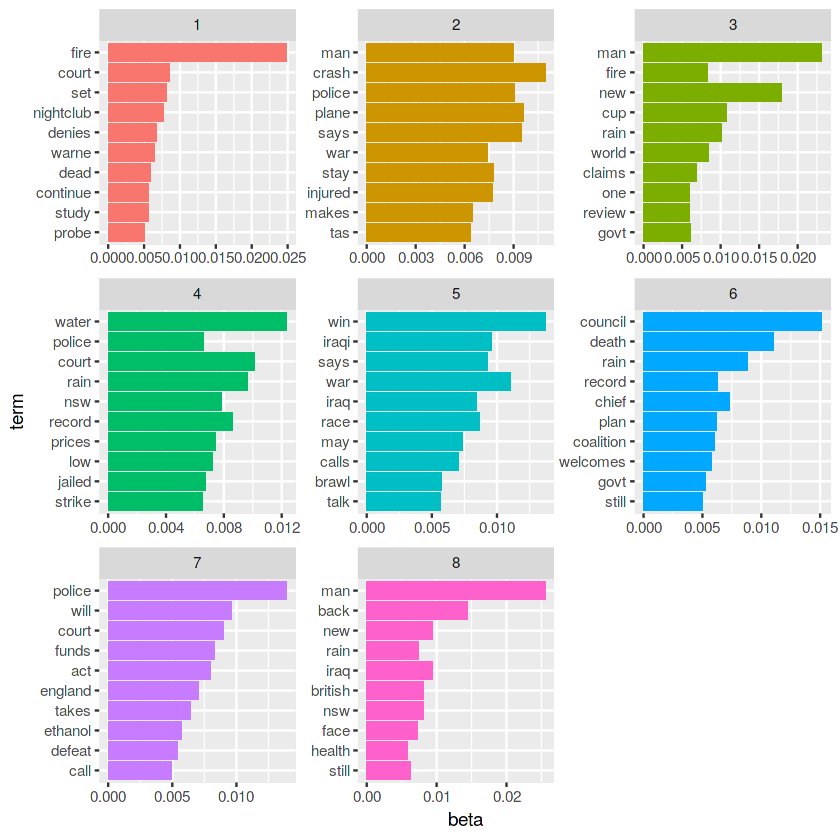

In [21]:
top_terms %>%
  mutate(term = reorder(term, beta)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip()